<a href="https://colab.research.google.com/github/mov-z/Vision-AI-Tutorials/blob/main/Image-Generation/Stable_Diffusion_v1_4_Text_to_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stable Diffusion v1.4 Text-to-Image Generation**

**Huggingface**의 `diffuser` 라이브러리를 사용하여 **Stable Diffusion v1.4** 모델로 이미지를 생성하는 기본적인 예제입니다.

## **1. 환경 세팅**
- 필요 패키지 설치
- Huggingface 계정 로그인 (access token 필요)

In [1]:
!pip install -q diffusers transformers accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 22.0 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login

notebook_login()

## **2. Stable Diffusion 모델 로드**
- Huggingface 로그인 후에 Stable Diffusion 1.4 모델을 로드할 수 있음
- model_id는 우리가 사용할 모델의 ID이며, pipe는 StableDiffusionPipeline을 통해 모델을 GPU에 로드

In [4]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

# 모델 로드 (Stable Diffusion v1-4)
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")  # GPU 사용

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## **3. 텍스트 프롬프트로 이미지 생성**
- Stable Diffusion은 텍스트 프롬프트를 입력받아 그에 맞는 이미지를 생성
- 여기서 prompt는 텍스트 설명으로, 해당 설명에 맞는 이미지를 생성
- `guidance_scale`은 모델이 텍스트 프롬프트를 얼마나 "강력하게" 반영할지를 결정하는 매개변수로, 이 값이 높을수록 모델은 더 창의적이고 자유롭게 이미지를 생성하며, 낮을수록 더 구체적이고 프롬프트에 엄격하게 따름

  0%|          | 0/50 [00:00<?, ?it/s]

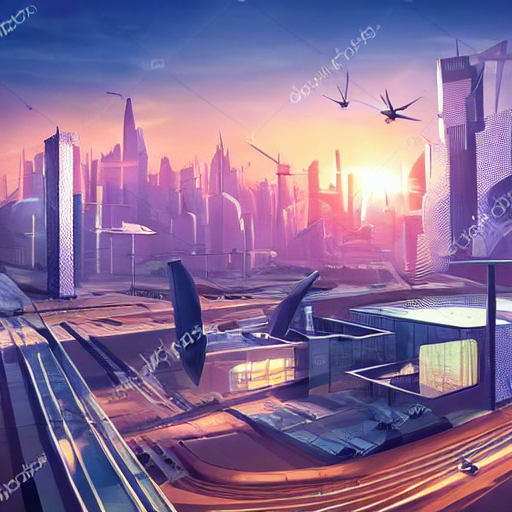

In [5]:
# 생성할 이미지에 대한 텍스트 프롬프트 정의
prompt = "A futuristic cityscape at sunset with flying cars"

# 이미지 생성
guidance_scale = 7.5  # 창의성(높을수록 창의적, 낮을수록 구체적)
image = pipe(prompt, guidance_scale=guidance_scale).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

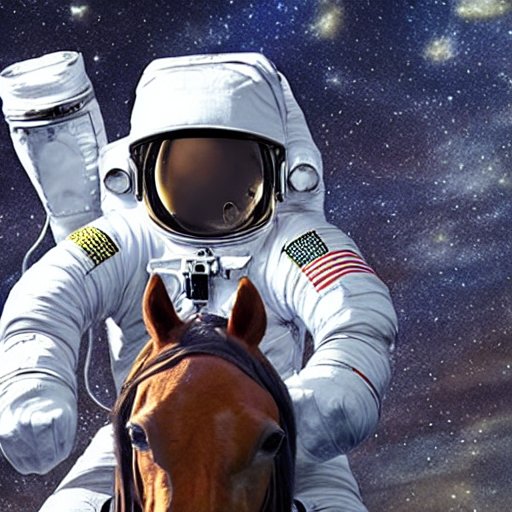

In [6]:
prompt = "An astronaut riding a horse in a photorealistic style"
image = pipe(prompt, guidance_scale=guidance_scale).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

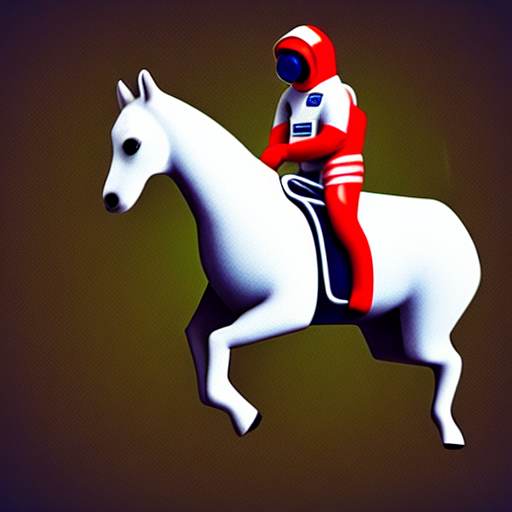

In [7]:
# 더 창의적인 이미지 생성
guidance_scale = 15.0
image = pipe(prompt, guidance_scale=guidance_scale).images[0]
image

## **4. 배치 생성**
- 한 번에 여러 장의 이미지를 생성하고 싶다면 다음 코드를 사용할 수 있음

  0%|          | 0/50 [00:00<?, ?it/s]

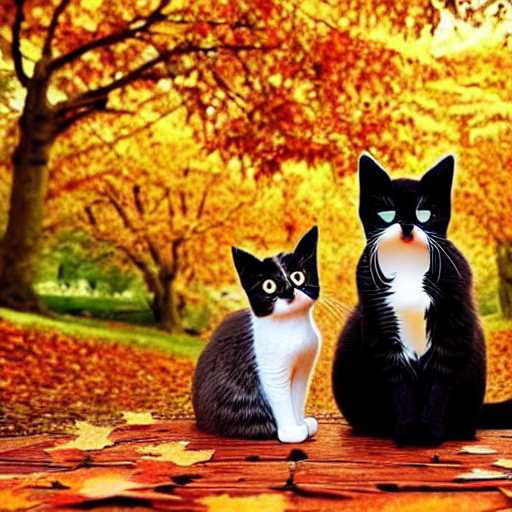

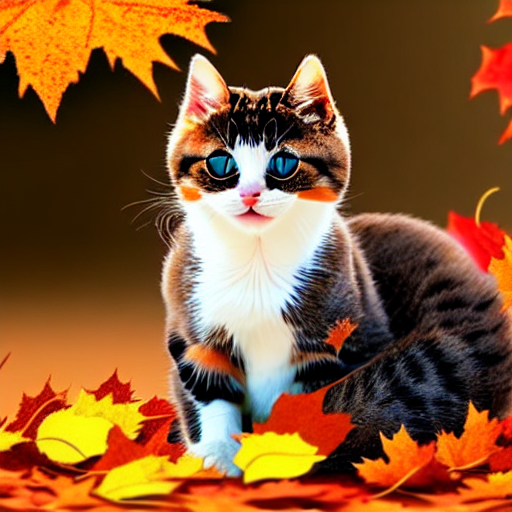

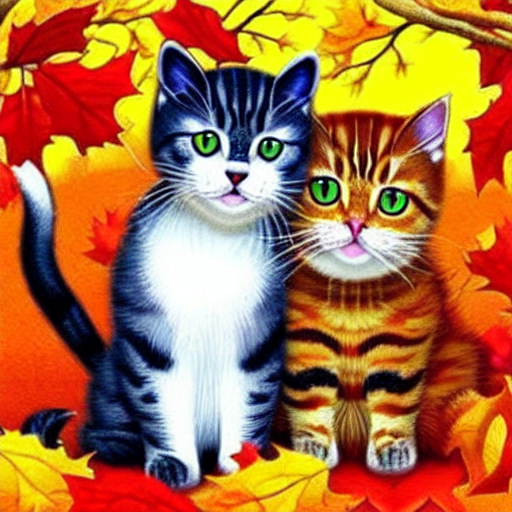

In [8]:
prompt = "Cute cats feeling the autumn mood"

num_images = 3
images = pipe([prompt] * num_images, guidance_scale=guidance_scale).images

for i, img in enumerate(images):
    display(img)  # Colab에서 이미지를 보여줌